In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
annonces = pd.read_csv("annonces_completes_notaires.csv")

Aucun doublon

In [5]:
annonces.duplicated().sum()

np.int64(0)

Aucune valeur manquante

In [7]:
annonces.isna().sum()

Departement     0
URL             0
Titre           0
Type_Bien       0
Localisation    0
Prix            0
Surface_m2      0
Nb_Pieces       0
Description     0
dtype: int64

In [8]:
annonces.describe()

,Departement,Prix,Surface_m2,Nb_Pieces
count,882.000000,8.820000e+02,882.000000,882.000000
mean,41.730159,3.606087e+05,104.716145,2.969388
std,25.047328,4.316473e+05,65.688425,1.858860
min,1.000000,1.900000e+04,6.550000,1.000000
25%,21.000000,1.583250e+05,65.612500,2.000000
50%,38.000000,2.490000e+05,91.000000,3.000000
75%,69.000000,3.990000e+05,127.060000,4.000000
max,83.000000,5.000000e+06,580.000000,22.000000


In [9]:
annonces["prix_m2"]=annonces["Prix"]/annonces["Surface_m2"]

In [12]:
annonces.describe()

,Departement,Prix,Surface_m2,Nb_Pieces,prix_m2
count,882.000000,8.820000e+02,882.000000,882.000000,882.000000
mean,41.730159,3.606087e+05,104.716145,2.969388,3702.139459
std,25.047328,4.316473e+05,65.688425,1.858860,3016.168930
min,1.000000,1.900000e+04,6.550000,1.000000,208.333333
25%,21.000000,1.583250e+05,65.612500,2.000000,1975.983901
50%,38.000000,2.490000e+05,91.000000,3.000000,2919.855499
75%,69.000000,3.990000e+05,127.060000,4.000000,4202.432742
max,83.000000,5.000000e+06,580.000000,22.000000,33333.333333


In [16]:
def ajout_colonnes(df):

    def nettoyer_localisation(texte):

        # 1. On retire le tiret et l'espace du début ("- ")
        # lstrip('- ') retire ces caractères s'ils sont au début
        texte_propre = texte.lstrip('- ').strip()

        # 2. On coupe la chaîne au séparateur " - " (qui sépare la ville du département)
        # Exemple : "Paris 12 - Paris (75)" devient ["Paris 12", "Paris (75)"]
        # On prend l'élément [0]
        if " - " in texte_propre:
            ville = texte_propre.split(' - ')[0]
        else:
            ville = texte_propre

        return ville.strip()

    # Création de la colonne Ville
    df['Ville'] = df['Localisation'].apply(nettoyer_localisation)

    # Création de la colonne prix_m2
    df['prix_m2'] = df['Prix'] / df['Surface_m2']
    # Arrondi à 2 décimales
    df['prix_m2'] = df['prix_m2'].round(2)

    return df

if __name__ == "__main__":
    fichier_csv = "annonces_completes_notaires.csv"

    try:
        # Chargement
        df = pd.read_csv(fichier_csv)

        # Traitement
        df = ajout_colonnes(df)

        # Sauvegarde
        df.to_csv("annonces_immo_final.csv", index=False)

    except Exception as e:
        print(f"Erreur : {e}")

Commet le prix au mètre carré varie-t-il selon le département, la surface et le type de bien immobilier en France ?

In [18]:
# Configuration du style des graphiques
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [19]:
immo = pd.read_csv("annonces_immo_final.csv")

In [20]:
#simplification du type de logement en 2 catégories : Maison et appartement

def simplifier_type(val):
    val = str(val).lower()
    if 'appartement' in val: return 'Appartement'
    if 'maison' in val or 'villa' in val: return 'Maison'
    return 'Autre'

immo['Type'] = immo['Type_Bien'].apply(simplifier_type)

In [23]:
# Calcul des statistiques par département
stats_dept = immo.groupby('Departement')['prix_m2'].agg(['mean', 'median', 'min', 'max', 'count'])
stats_dept = stats_dept.sort_values(by='mean', ascending=False)

# Renommer les colonnes pour faire propre
stats_dept.columns = ['Moyenne (€/m²)', 'Médiane (€/m²)', 'Min', 'Max', 'Nombre de biens']

# Affichage
stats_dept.round(2)

,Moyenne (€/m²),Médiane (€/m²),Min,Max,Nombre de biens
Departement,,,,,
75,11319.72,10451.82,4647.89,19469.98,60
6,6347.42,5343.58,1124.50,33333.33,56
83,4755.52,4168.12,1103.96,13214.29,56
69,3661.50,3466.95,1516.67,7990.78,58
13,3543.71,3243.70,1588.14,8000.00,57
33,3474.23,3294.39,855.91,10775.19,59
34,3415.28,3215.48,241.82,7467.24,60
44,3340.97,3273.20,1322.92,6468.82,60
1,2844.61,2507.78,557.75,6428.89,60


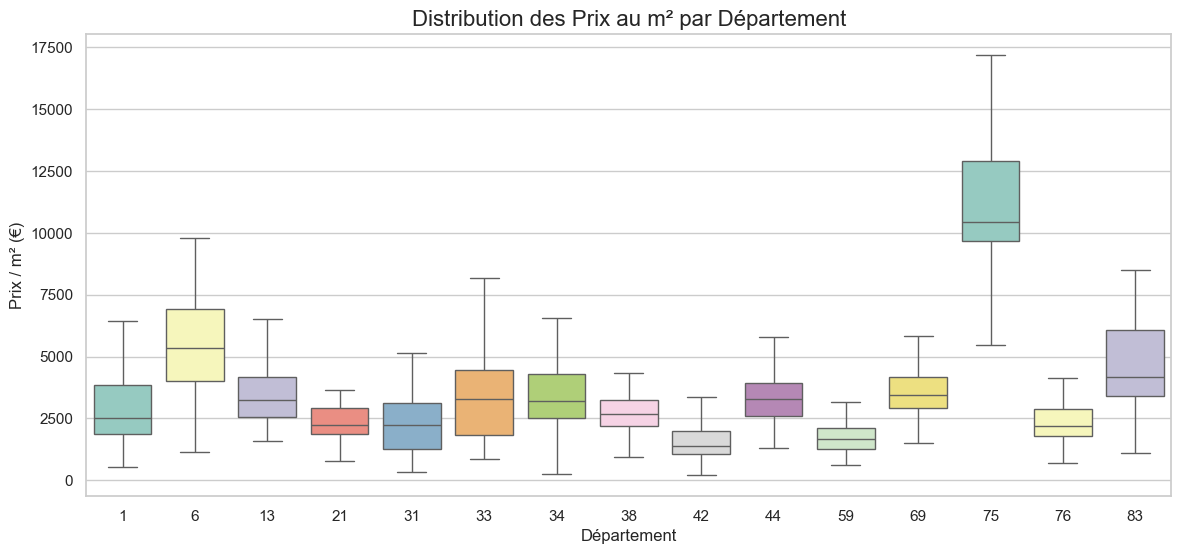

In [43]:
plt.figure(figsize=(14, 6))

# Création du Boxplot
sns.boxplot(x='Departement', y='prix_m2', data=immo, showfliers=False, palette="Set3", hue='Departement',legend=False)

plt.title('Distribution des Prix au m² par Département', fontsize=16)
plt.ylabel('Prix / m² (€)')
plt.xlabel('Département')
plt.show()

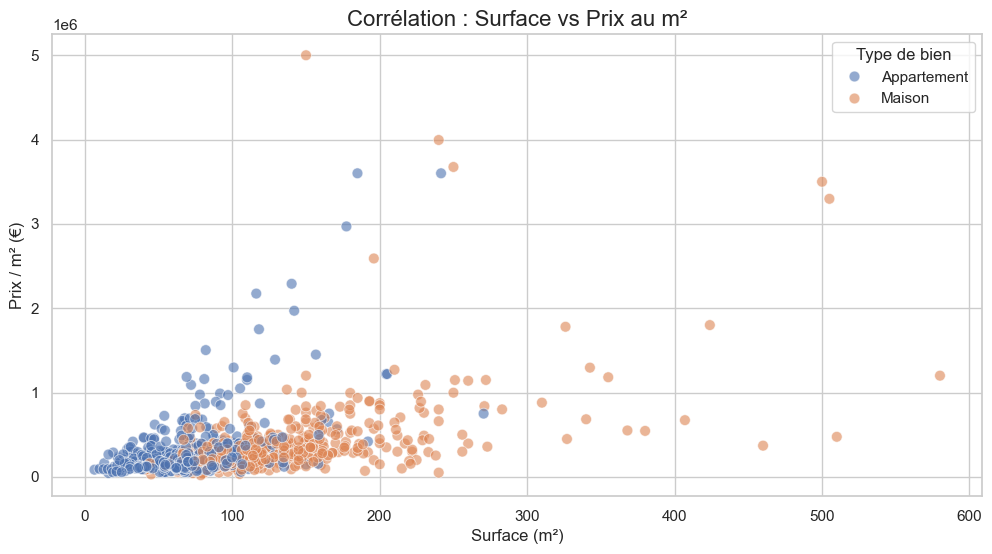

In [28]:
plt.figure(figsize=(12, 6))

# Nuage de points
sns.scatterplot(
    data=immo,
    x='Surface_m2',
    y='Prix',
    hue='Type', # Couleurs différentes pour Maison/Appart
    alpha=0.6,
    s=60
)

plt.title('Corrélation : Surface vs Prix au m²', fontsize=16)
plt.xlabel('Surface (m²)')
plt.ylabel('Prix / m² (€)')
plt.legend(title='Type de bien')
plt.show()

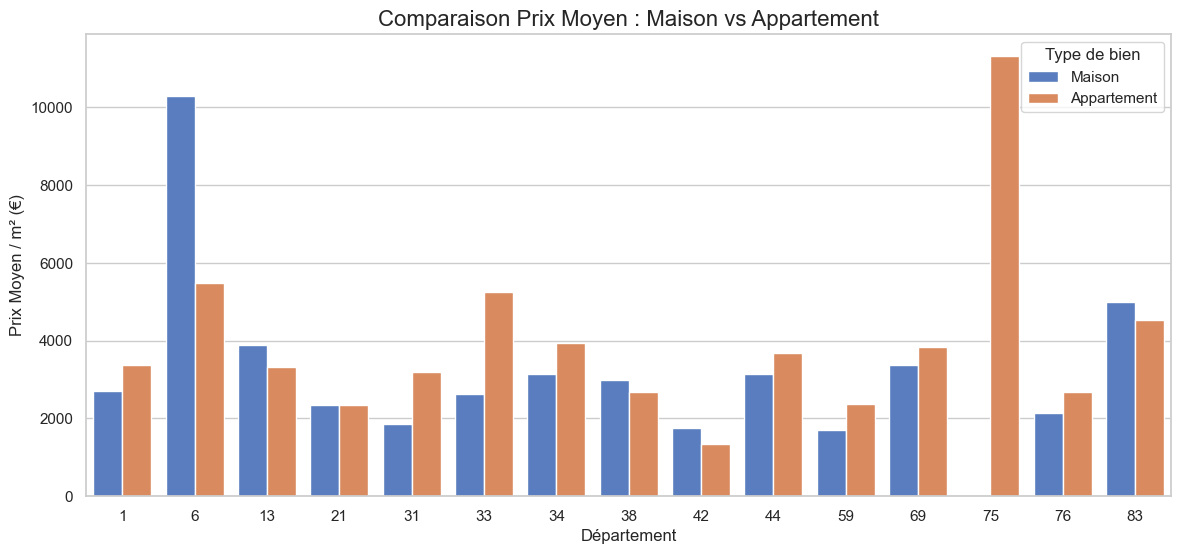

In [42]:
plt.figure(figsize=(14, 6))

# Barplot comparatif
sns.barplot(
    data=immo,
    x='Departement',
    y='prix_m2',
    hue='Type',
    errorbar=None,
    palette="muted"
)

plt.title('Comparaison Prix Moyen : Maison vs Appartement', fontsize=16)
plt.ylabel('Prix Moyen / m² (€)')
plt.xlabel('Département')
plt.legend(title='Type de bien')
plt.show()

In [40]:
# Création du graphique interactif
fig = px.scatter(
    immo,
    x="Surface_m2",
    y="Prix",
    hover_data=['Ville', 'Nb_Pieces'], # Infos affichées au survol
    title="Prix vs Surface",
    opacity=0.7
)

fig.show()

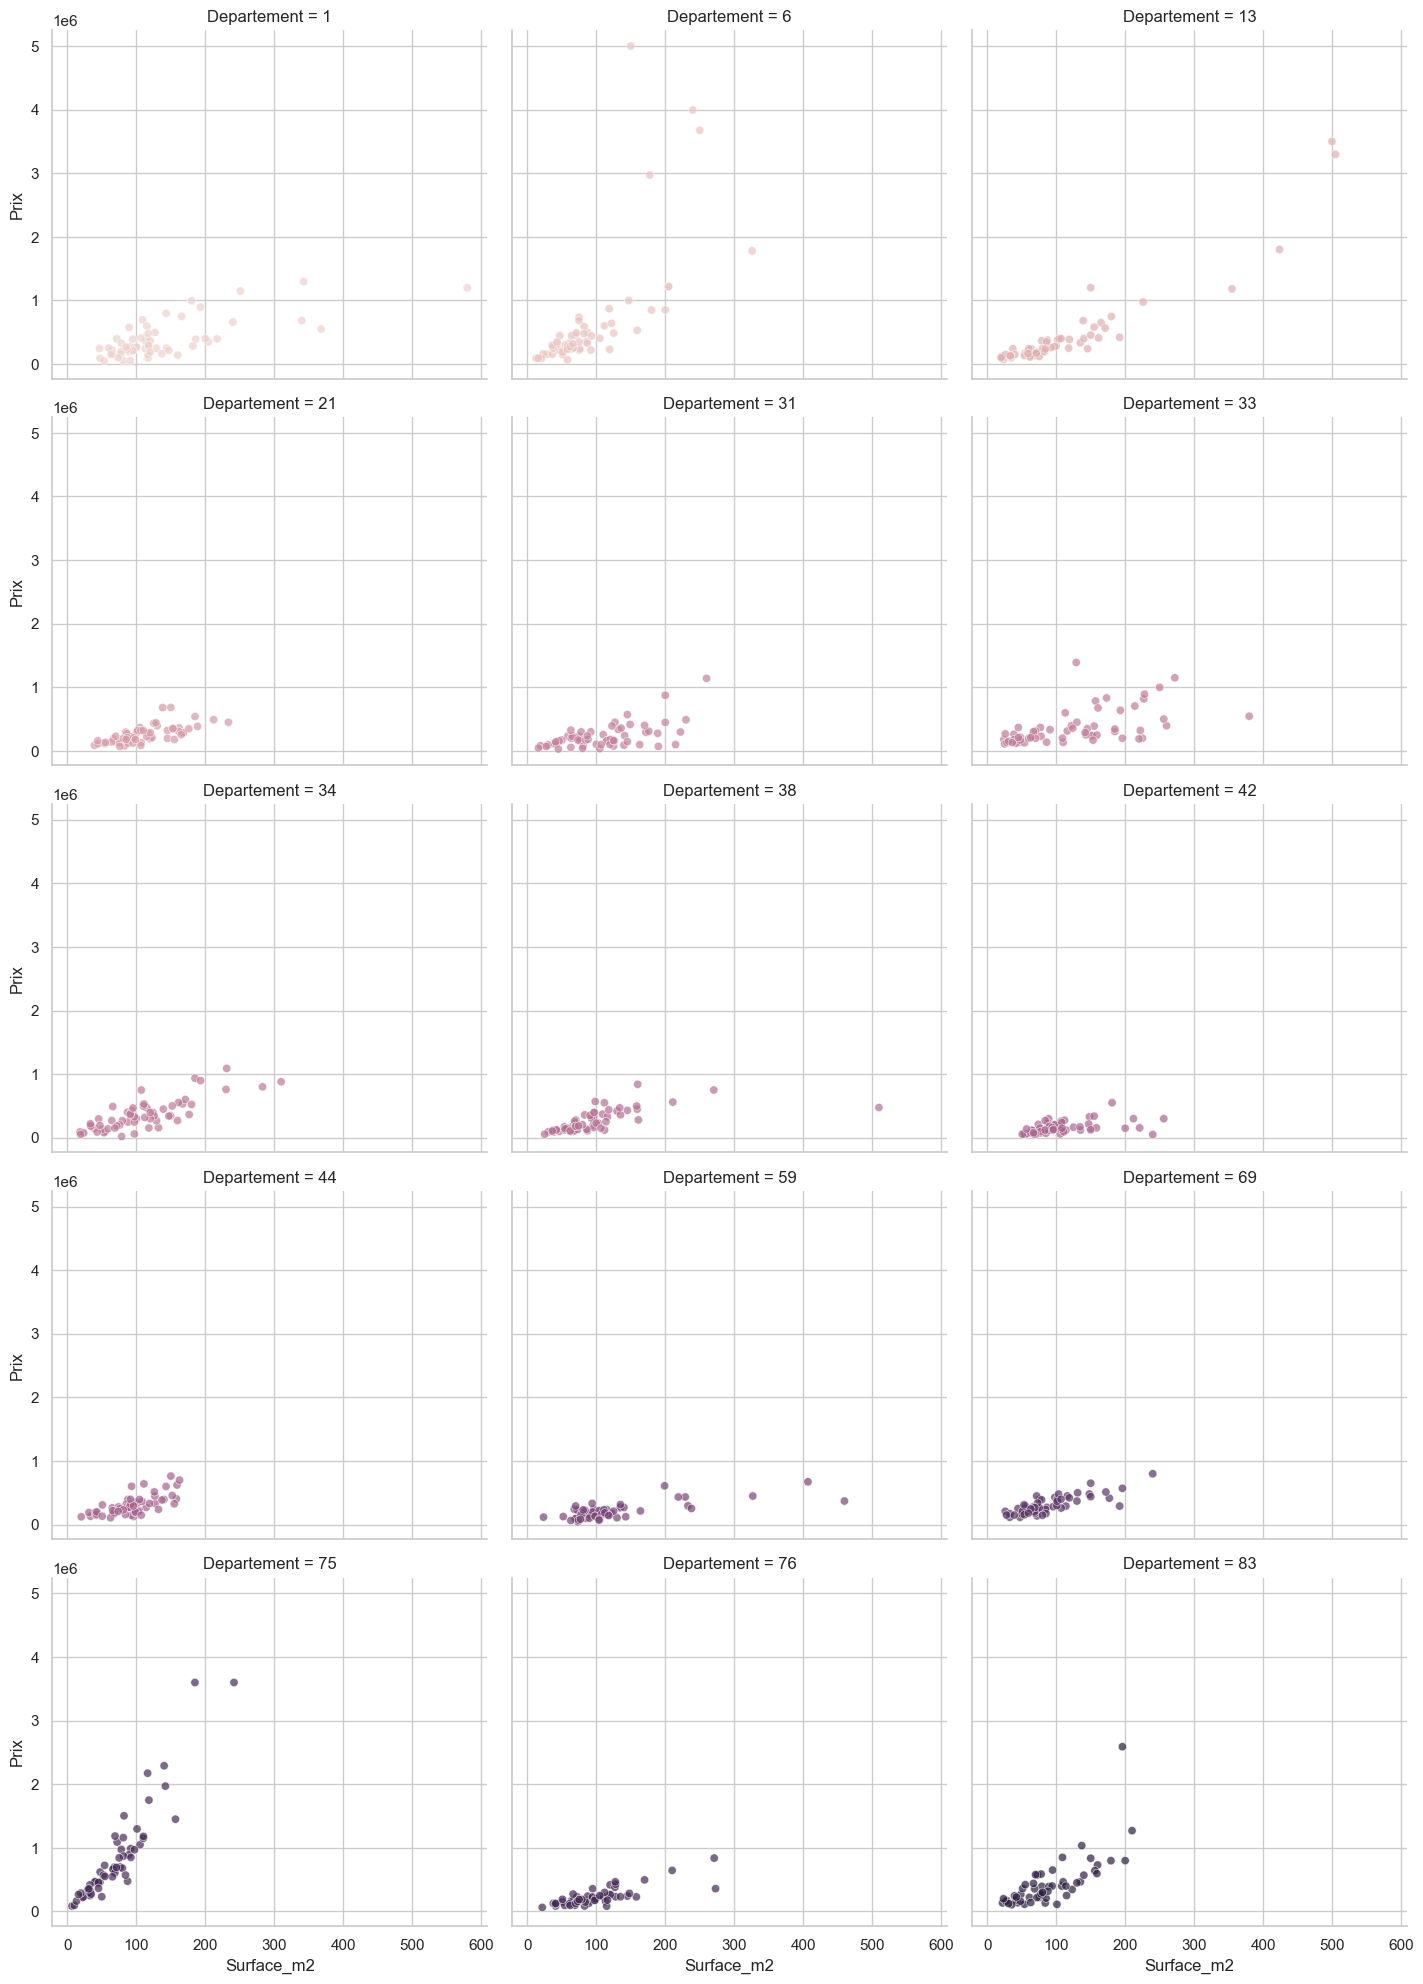

In [41]:
# Cette commande crée automatiquement une grille de graphiques
sns.relplot(
    data=immo,
    x='Surface_m2',
    y='Prix',
    col='Departement',  # Crée un graphique distinct par département
    hue='Departement',
    col_wrap=3,         # Affiche 3 graphiques par ligne
    height=4,           # Hauteur de chaque petit graphique
    aspect=1.2,
    alpha=0.7,
    legend=False,
)

plt.show()